Mean Squared Error: 25.710858807788185


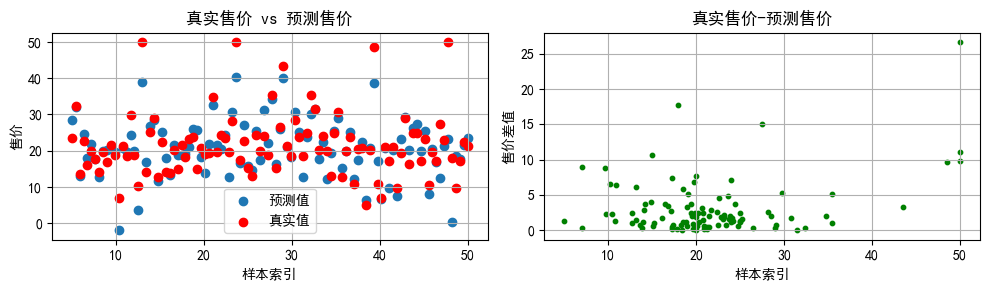

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 加载数据data\boston_house_prices.csv
data = pd.read_csv('../data/boston_house_prices.csv')
# 检查并处理缺失值
data.dropna(inplace=True)	
# 特征选择
cols = ['RM', 'LSTAT', 'PTRATIO', 'TAX', 'DIS', 'RAD']  # 假设这些特征
features = data[cols]
target = data['MEDV']	
# 标准化特征
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(
	features_scaled, target, test_size=0.2, random_state=42
	)

model = LinearRegression()
model.fit(X_train, y_train)
# 预测
y_pred = model.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 设置支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']
# 设置支持负号
plt.rcParams['axes.unicode_minus'] = False
# 可视化预测结果
plt.figure(figsize=(10, 3))
plt.subplot(121)
x_range = np.linspace(y_test.min(), y_test.max(), len(y_test))
plt.scatter(x_range, y_pred, label='预测值')
plt.scatter(x_range, y_test, color='red', linewidth=1, label='真实值')
plt.xlabel('样本索引')
plt.ylabel('售价')
plt.title('真实售价 vs 预测售价')
plt.tight_layout()
plt.grid()
plt.legend()
plt.subplot(122)
plt.scatter(y_test, np.abs(y_pred - y_test), color='green', s=10)
plt.title('真实售价-预测售价')
plt.xlabel('样本索引')
plt.ylabel('售价差值')
plt.tight_layout()
plt.grid()
plt.show()